<a href="https://colab.research.google.com/github/LizzouliG/Exercise-Regression/blob/main/12.%20Clustering%20-%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering
======

When a data set doesn’t have labels we can use unsupervised learning to find some kind of structure in the data - allowing us to discover patterns or groupings.

Cluster analysis is a method of finding groupings, known as clusters, in datasets. As the data sets are unlabelled, cluster analysis tries to group similar examples using the examples features.

K-means clustering lives true to its name - it separates examples into k number of clusters (so if k is 5, it will divide the examples into 5 clusters) and it partitions the examples by the average (mean) of the clusters.

Step 1
-----

In this exercise we will look at using k-means clustering to categorise a few different datasets.

Let's start by first creating three clusters.

#### Run the code below to set up the graphing features.

In [1]:
# This sets up the graphs
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

### In the cell below replace:
#### 1. `<addClusterData>` with `cluster_data`
#### 2. `<addOutput>` with `output`
#### and then __run the code__.

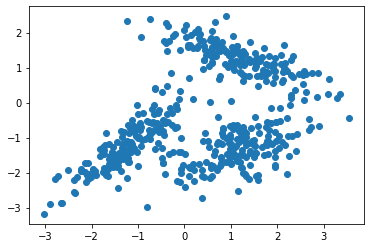

In [2]:
# Let's make some data!
import numpy as np
from sklearn import datasets

###
# REPLACE <addClusterData> WITH cluster_data AND <addOutput> WITH output
###
cluster_data, output = datasets.make_classification(n_samples = 500, n_features = 2, n_informative = 2, n_redundant = 0, n_repeated = 0,
                                                    n_classes = 3, n_clusters_per_class = 1, class_sep = 1.25, random_state = 6)
###

# Let's visualise it
graph.scatter(cluster_data.T[0], cluster_data.T[1])
graph.show()

Now let's see how k-means performs on a dataset like this!

### In the cell below replace:
#### 1. `<addKMeans>` with `KMeans`
#### 2. `<addFit>` with `fit`
#### 3. `<addClusterCenters>` with `k_means.cluster_centers_`
#### 4. `<addLabels>` with `k_means.labels_`
#### and then __run the code__.

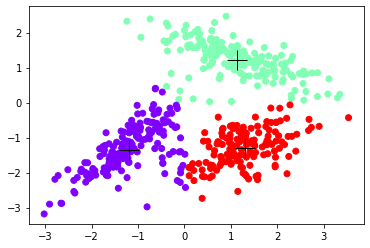

In [5]:
from sklearn.cluster import KMeans

###
# REPLACE <addKMeans> WITH KMeans
###
k_means = KMeans(n_clusters=3)
###

###
# REPLACE <addFit> WITH fit
###
k_means.fit(cluster_data)
###

# Let's visualise it
###
# REPLACE <addClusterCenters> BELOW WITH k_means.cluster_centers_
###
for mean in k_means.cluster_centers_:
    graph.plot(mean[0], mean[1], 'ko', marker = '+', markersize = 20)
###

###
# REPLACE <addLabels> BELOW WITH k_means.labels_
###
graph.scatter(cluster_data.T[0], cluster_data.T[1], c = k_means.labels_)
###

graph.show()

It performs rather well, by the looks of it! But we already knew that it had three clusters, sometimes it might not be so clear. 

## Step 2

Let's generate another dataset in which it may be a little less obvious how many classes it contains.

#### Replace `<addMakeClassification>` with `datasets.make_classification` and run the code.

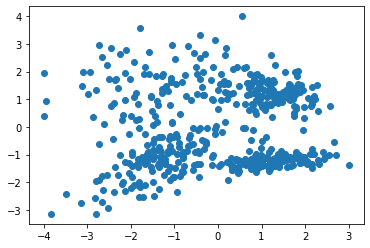

In [6]:
###
# REPLACE <addMakeClassification> BELOW WITH datasets.make_classification
###
cluster_data, output = datasets.make_classification(n_samples = 500, n_features = 2, n_informative = 2, n_redundant = 0, n_repeated = 0, 
                                            n_classes = 4, n_clusters_per_class = 1, class_sep = 1.25, random_state = 6)
###

graph.scatter(cluster_data.T[0], cluster_data.T[1])
graph.show()

In instances where we do not know how many classes to expect, it is handy to run k-means multiple times and compare how the data looks when divided up into a differing number of classes. Let's try that now.

#### Replace `<addNHere>` with `n` and run the code

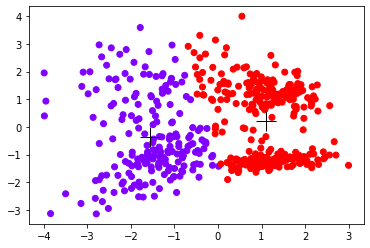

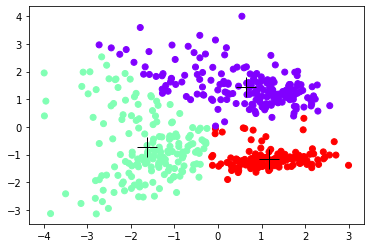

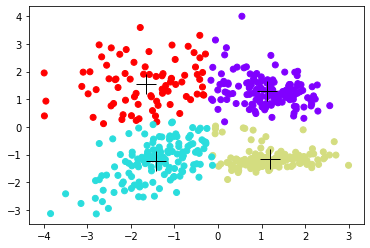

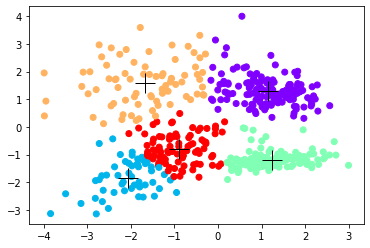

In [8]:
###
# REPLACE <addNHere> BELOW WITH n
###
for n in range(2,6):
    k_means = KMeans(n_clusters = n).fit(cluster_data)
###

    for mean in k_means.cluster_centers_:
        graph.plot(mean[0], mean[1], 'ko', marker = '+', markersize = 20)
    graph.scatter(cluster_data.T[0], cluster_data.T[1], c = k_means.labels_)
    graph.show()

Which one do you think best splits the data?

Step 3
========

K-means clustering performs well enough on clustered data like that, but let's try it out on a dataset that is not so linear.

#### Replace `<addMakeCircles>` with `make_circles` and run the code.

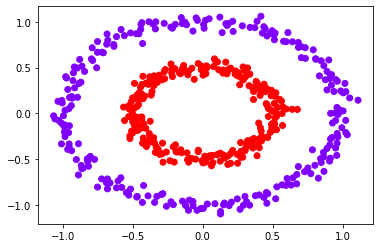

In [9]:
###
# REPLACE <addMakeCircles> BELOW WITH make_circles
###
ring_data, target = datasets.make_circles(n_samples = 500, factor = .5, noise = 0.05, random_state = 6)
###

graph.scatter(ring_data.T[0], ring_data.T[1], c = target)
graph.show()

We can clearly distinguish two "clusters", that is, the two rings of datapoints.

Let's see how k-means handles a dataset like this.

#### Replace `<addRingData>` with `ring_data` and run the code

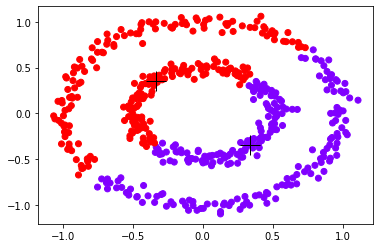

In [10]:
###
# REPLACE <addRingData> BELOW WITH ring_data
###
k_means = KMeans(n_clusters = 2).fit(ring_data)
###

for mean in k_means.cluster_centers_:
    graph.plot(mean[0], mean[1], 'ko', marker = '+', markersize = 20)
graph.scatter(ring_data.T[0], ring_data.T[1], c = k_means.labels_)
graph.show()

K-means clearly has difficulty solving this.

As we are using it, there is no way for k-means to place two means to label this data set correctly.

Step 4
------

But, we can try another way. We can use another feature - distance away from the centre.

Let's see if k-means is able to classify the two data clusters with this new feature.

#### Replace `<addSqrt>` with `np.sqrt` and run the code.

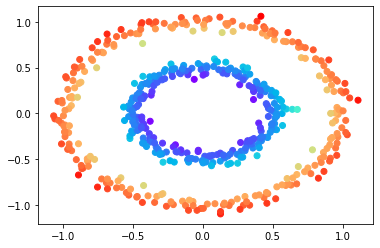

In [11]:
distance_from_center = []
for sample in ring_data:
###
# REPLACE <addSqrt> BELOW WITH np.sqrt
###
    z = 4 * np.sqrt(sample[0]**2 + sample[1]**2)
###
    distance_from_center.append(z)
# Make it a three-dimensional dataset
ring_data = np.concatenate((ring_data, np.array(distance_from_center).reshape(-1, 1)), axis = 1)

graph.scatter(ring_data.T[0], ring_data.T[1], c = ring_data.T[2])
graph.show()

Looks like it will work, so let's plot all three features.

### In the cell below replace:
#### 1. `<addProjection>` with `projection='3d'`
#### 2. `<addRingDataT>` with `ring_data.T[2]`
#### and then __run the code__. 

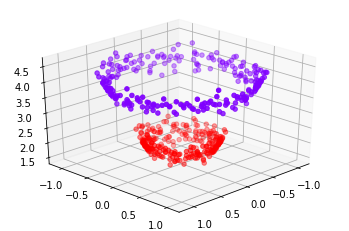

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = graph.figure()
###
# REPLACE <addProjection> BELOW WITH projection='3d'
###
ax = fig.add_subplot(111, projection='3d')
###

###
# REPLACE <addRingDataT> BELOW WITH ring_data.T[2]
###
ax.scatter(ring_data.T[0], ring_data.T[1], ring_data.T[2], c = target)
###

ax.view_init(30, 45)
graph.show()

Let's see how k-means deals with the data now that it has 3 features!

### In the cell below replace:
#### 1. `<addRingData>` with `ring_data`
#### 2. `<addLabels>` with `k_means.labels_`
#### and then __run the code__.

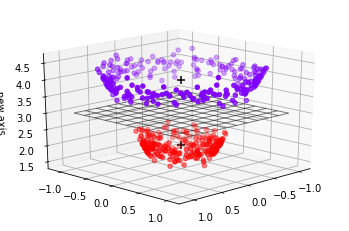

In [13]:
###
# REPLACE <addRingData> BELOW WITH ring_data
###
k_means = KMeans(n_clusters = 2, random_state = 0).fit(ring_data)
###

fig = graph.figure()
ax = fig.add_subplot(111, projection='3d')
for mean in k_means.cluster_centers_:
    ax.scatter(mean[0], mean[1], mean[2], c='black', marker='+', s=50) # plot the cluster centres
    
###
# REPLACE <addLabels> BELOW WITH k_means.labels_
###
ax.scatter(ring_data.T[0], ring_data.T[1], ring_data.T[2], c = k_means.labels_)
###

# We can plot a hyperplane that separates the two rings
hp_X, hp_Y = np.array(np.meshgrid(np.linspace(-1, 1, 11), np.linspace(-1, 1, 11)))
hp_Z = np.full(hp_X.shape, np.abs(k_means.cluster_centers_[0][2] - k_means.cluster_centers_[1][2] / 2))
ax.plot_wireframe(hp_X, hp_Y, hp_Z, rstride = 1, cstride = 1, 
                  color = 'k', linewidth = 1, linestyle = 'solid', alpha = 0.5)

ax.view_init(20, 45)
ax.set_zlabel('new axis')
graph.show()

You can see the `+` that indicates the center of the clusters. Looks good!

Step 5
------

Some data we cannot manipulate like that. Let's have a look at a different type of data distribution.

#### Replace `<addMakeMoons>` with `datasets.make_moons` and run the code.

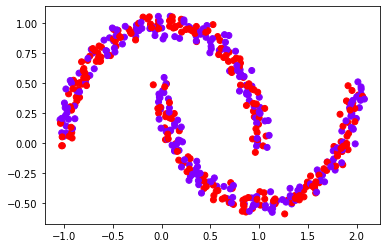

In [14]:
###
# REPLACE <addMakeMoons> BELOW WITH datasets.make_moons
###
crescent_data, output = datasets.make_moons(n_samples = 500, noise = .05)
###

graph.scatter(crescent_data.T[0], crescent_data.T[1], c = target)
graph.show()

Let's try fitting it.

#### Replace `<addCrescentData>` with `crescent_data` and run the code.

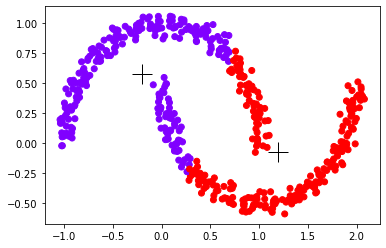

In [15]:
# Below we run KMeans on crescent_data using n_clusters = 2
###
# REPLACE <addCrescentData> WITH crescent_data
###
k_means = KMeans(n_clusters = 2).fit(crescent_data)
###

for mean in k_means.cluster_centers_:
    graph.plot(mean[0], mean[1], 'ko', marker = '+', markersize = 20)
graph.scatter(crescent_data.T[0], crescent_data.T[1], c = k_means.labels_)
graph.show()

Again, a similar issue as with the circle data.

But k-means is just one method for clustering, other methods don't have quite the same restrictions as k-means.

Step 6
------

Spectral clustering is a clustering method that aims to cluster data that is in some way connected - but not necessarily distributed.

### In the cell below replace:
#### 1. `<addSpectralClustering>` with `SpectralClustering`
#### 2. `<addCrescentData>` with `crescent_data`
#### 3. `<addLabels>` with `labels_`
#### and then __run the code__.

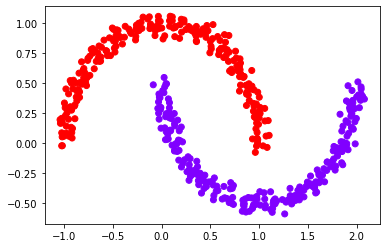

In [18]:
from sklearn import cluster

###
# REPLACE <addSpectralClustering> BELOW WITH SpectralClustering
###
spectral = cluster.SpectralClustering(n_clusters = 2, eigen_solver = 'arpack', affinity = 'nearest_neighbors')
###

###
# REPLACE <addCrescentData> BELOW WITH crescent_data
###
labels_ = spectral.fit_predict(crescent_data)
###

### 
# REPLACE <addLabels> BELOW WITH labels_
###
graph.scatter(crescent_data.T[0], crescent_data.T[1], c = labels_)
###
graph.show()

### In the cell below replace:
#### 1. `<addSpectralClustering>` with `SpectralClustering`
#### 2. `<addRingData>` with `ring_data`
#### 3. `<addLabels>` with `labels_`
#### and then __run the code__.

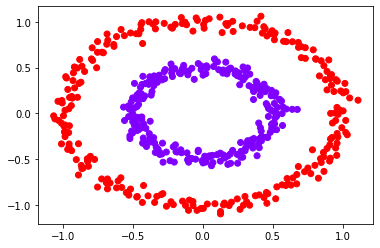

In [19]:
# Let's use spectral clustering on the ring_data

###
# REPLACE <addSpectralClustering> BELOW WITH SpectralClustering
###
spectral = cluster.SpectralClustering(n_clusters = 2, eigen_solver = 'arpack', affinity = 'nearest_neighbors')
###

###
# REPLACE <addRingData> BELOW WITH ring_data
###
labels_ = spectral.fit_predict(ring_data)
###

###
# REPLACE <addLabels> BELOW WITH labels_
###
graph.scatter(ring_data.T[0], ring_data.T[1], c = labels_)
###
graph.show()

Does it classify the data in the correct clusters?

## Conclusion

We have learnt two important clustering methods, k-means and spectral clustering, and used them on a variety of datasets where one might be more appropriate to use than the other.